# In this Exploratory Data Analysis (EDA), following points will be discussed.

- Descriptive statistics of the 2021 dataset

- Correlation among the variables

- Happines Score distribution over the regions

- Descriptive statistics of 2021 dataset for Latin America and Caribbean region

- Happiness Score's trend in 2021 and the previous years at Latin America and Caribbean



Note: If you ever encounter with "ModuleNotFoundError: No module named 'plotly', you can run the very below pip code.

In [ ]:
# pip install plotly

As first step, lets' import the related libraries for further analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl



import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In this Exploratory Data Analysis (EDA), World Happiness Report 2021 and World Happines Report (which includes data before 2021) will be used.

In [2]:
df_2021 = pd.read_csv("world-happiness-report-2021.csv")
df_past = pd.read_csv("world-happiness-report.csv")

In [3]:
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
df_2021.shape

(149, 20)

In [5]:
df_past.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [6]:
df_past.shape

(1949, 11)

In [7]:
df_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [8]:
df_past.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

To make it easy to be more understandable, we will rename the column names in the old dataset. In this regard, 
"Life Ladder" will be "Ladder score", "Log GDP per capita" will be Logged GDP per capita" and "Healthy life expectancy at birth" will be "Healthy life expectancy".

In [9]:
df_past = df_past.rename(columns={'Life Ladder':'Ladder score', 'Log GDP per capita':'Logged GDP per capita',
                                  'Healthy life expectancy at birth':'Healthy life expectancy'})

In [10]:
df_2021.sample(3)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
141,Tanzania,Sub-Saharan Africa,3.623,0.071,3.762,3.485,7.876,0.702,57.999,0.833,0.183,0.577,2.43,0.433,0.540,0.300,0.549,0.307,0.231,1.263
139,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,-0.024,0.607,2.43,0.000,0.062,0.155,0.298,0.172,0.212,2.876
107,Georgia,Commonwealth of Independent States,4.891,0.054,4.998,4.785,9.585,0.671,64.300,0.783,-0.238,0.655,2.43,1.030,0.470,0.498,0.488,0.032,0.181,2.191


In [12]:
df_past.sample(3)

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1551,Slovenia,2013,5.975,10.385,0.932,69.8,0.890,0.036,0.918,0.635,0.274
1342,Panama,2009,7.034,9.930,0.905,68.2,0.721,0.014,0.889,0.883,0.144
190,Bolivia,2018,5.916,9.066,0.827,63.6,0.863,-0.093,0.786,0.742,0.387


### In this EDA, areas of focus will be on the following columns:
- 'Country name',
- 'Regional indicator',
- 'Ladder score',
- 'Logged GDP per capita',
- 'Social support',
- 'Healthy life expectancy',
- 'Freedom to make life choices',
- 'Generosity',
- 'Perceptions of corruption'


For that reason we will make further adjustments. First thing first, let's create a new dataframe that consists of above columns.

In [14]:
df1_2021 = df_2021[['Country name','Regional indicator','Ladder score','Logged GDP per capita',
                    'Social support','Healthy life expectancy','Freedom to make life choices',
                    'Generosity','Perceptions of corruption']].copy()

In [15]:
df1_2021.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


Let's check out the general info of new dataset to see whether there is any missing value.

In [16]:
df1_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


So far all seems good.

Now, let's check general statistical information of the given dataset.

In [17]:
df1_2021.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


Let's see how the correlation among numerical variables in the dataset looks like.

In [18]:
df1_2021.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


It is a well-known fact that high level of correlation is interpreted differenly. While 80% or above is a good sign of the string correlation for some areas, for others, this percentage may drop to around 60%. 

- With bearing that in mind, Ladder Score has strong level correlation with GDP, Social Support, Healthy life Expectancy.

- Freedom to make life choice and Ladder score have mid-level correlation between them.

- Perception of corruption and Ladder score have weak level negative level correlation between them.

Let's draw the heatmap of what the dataframe above says.

<AxesSubplot:>

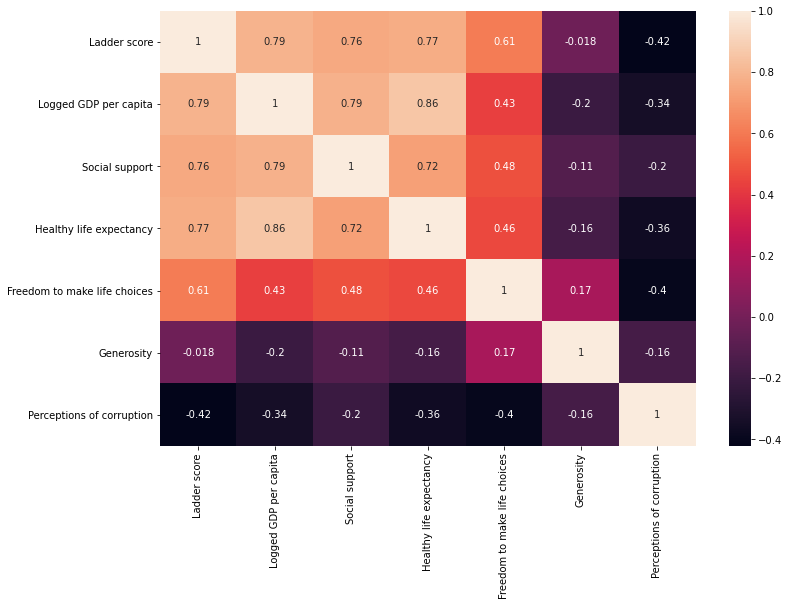

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1_2021.corr(), annot=True)

Before passing on to Latin America and Caribbean, let's see the happiness score at the Regional Level.

In [21]:
df1_2021.groupby("Regional indicator")["Ladder score"].describe()

,count,mean,std,min,25%,50%,75%,max
Regional indicator,,,,,,,,
Central and Eastern Europe,17.0,5.984765,0.493325,5.101,5.81300,6.0780,6.25500,6.965
Commonwealth of Independent States,12.0,5.467000,0.438116,4.875,5.14475,5.4715,5.74950,6.179
East Asia,6.0,5.810333,0.439913,5.339,5.52700,5.7610,5.91625,6.584
Latin America and Caribbean,20.0,5.908050,0.693467,3.615,5.75200,5.9920,6.31100,7.069
Middle East and North Africa,17.0,5.219765,0.999259,3.658,4.58400,4.8870,6.10600,7.157
North America and ANZ,4.0,7.128500,0.138057,6.951,7.06500,7.1430,7.20650,7.277
South Asia,7.0,4.441857,0.993462,2.523,4.07200,4.9340,5.11150,5.269
Southeast Asia,9.0,5.407556,0.606271,4.426,5.03000,5.3840,5.88000,6.377
Sub-Saharan Africa,36.0,4.494472,0.654892,3.145,4.09850,4.6160,4.99925,6.049


Based on the above information, it is easily seen that,

- Western Europe has the highest level happiness score, 

on the other hand;

- South Asia and Sub-Saharan Africa have the lowest level happiness score amongst the regions.

Let's look at the boxplot to see overall distribution of the happiness score at the different regions.

In [23]:
fig = px.box(data_frame=df1_2021, x="Ladder score", y="Regional indicator", hover_data=df1_2021[["Regional indicator", "Country name"]])
fig.update_traces(quartilemethod="inclusive")
fig.show()

Based on the happiness score distributions on the regions, several outliers are seen in the:

- Latin America and Caribbean
- Central and Eastern Europe

Now, let's look in detail to Latin America and Caribbean part of our dataset.

In [24]:
df1_2021["Regional indicator"].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [25]:
latin_america_caribbean = df1_2021[df1_2021["Regional indicator"]=="Latin America and Caribbean"]
latin_america_caribbean

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
15,Costa Rica,Latin America and Caribbean,7.069,9.880,0.891,71.400,0.934,-0.126,0.809
29,Guatemala,Latin America and Caribbean,6.435,9.053,0.813,64.958,0.906,-0.038,0.775
30,Uruguay,Latin America and Caribbean,6.431,9.966,0.925,69.100,0.896,-0.092,0.590
34,Brazil,Latin America and Caribbean,6.330,9.577,0.882,66.601,0.804,-0.071,0.756
35,Mexico,Latin America and Caribbean,6.317,9.859,0.831,68.597,0.862,-0.147,0.799
36,Jamaica,Latin America and Caribbean,6.309,9.186,0.877,67.500,0.890,-0.137,0.884
40,Panama,Latin America and Caribbean,6.180,10.350,0.896,69.652,0.872,-0.166,0.856
42,Chile,Latin America and Caribbean,6.172,10.071,0.882,70.000,0.742,-0.044,0.830
48,El Salvador,Latin America and Caribbean,6.061,9.054,0.762,66.402,0.888,-0.110,0.688
51,Colombia,Latin America and Caribbean,6.012,9.557,0.847,68.001,0.837,-0.135,0.841


Let's see how correlated the variables in Latin America and Caribben are.

In [26]:
latin_america_caribbean.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.683969,0.744444,0.813428,0.817716,-0.649260,0.045859
Logged GDP per capita,0.683969,1.000000,0.811788,0.812662,0.475722,-0.787183,0.201445
Social support,0.744444,0.811788,1.000000,0.861253,0.524923,-0.772341,0.170640
Healthy life expectancy,0.813428,0.812662,0.861253,1.000000,0.537114,-0.797497,0.200538
Freedom to make life choices,0.817716,0.475722,0.524923,0.537114,1.000000,-0.478351,0.000756
Generosity,-0.649260,-0.787183,-0.772341,-0.797497,-0.478351,1.000000,-0.277508
Perceptions of corruption,0.045859,0.201445,0.170640,0.200538,0.000756,-0.277508,1.000000


There are many similarities with the whole 2021 Happines Score correlation matrix. Happiness score's correlation with the other variables in Latin America and Caribbean is mainly higher than whole dataset correlation matrix results (however, there are some correlation matrix results in Latin America and Caribbean that are lower than the whole dataset correlation matrix results.

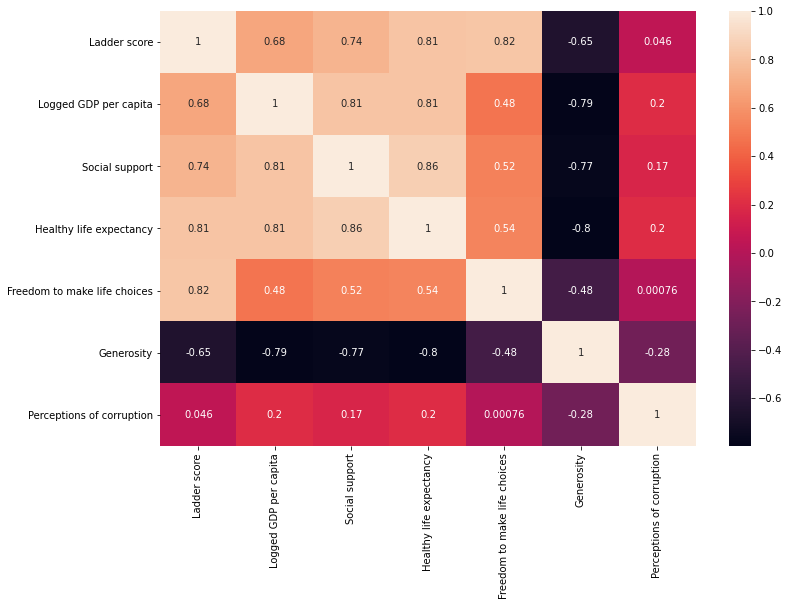

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(latin_america_caribbean.corr(), annot=True);

In [28]:
latin_america_caribbean.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,5.908050,9.370000,0.839500,67.076050,0.831750,-0.067700,0.792600
std,0.693467,0.650216,0.080872,3.219192,0.088115,0.135642,0.080603
min,3.615000,7.477000,0.540000,55.700000,0.593000,-0.182000,0.590000
25%,5.752000,9.053750,0.819000,66.327000,0.826500,-0.139500,0.747250
50%,5.992000,9.453000,0.857000,67.578500,0.858500,-0.117000,0.818000
75%,6.311000,9.864250,0.884250,68.850000,0.879000,-0.042500,0.841500
max,7.069000,10.350000,0.925000,71.400000,0.934000,0.422000,0.891000


Based on the descriptive information, based on the Mean-Median differences and IQRs (InterQuartile Ranges) possible outliers can be seen in the:

- Happiness Score
- Logged GDP per capita
- Social Support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption

For the sake of the simplicity, in this EDA we will focus on Happiness Score.
For further detail, let's make a boxplot, barplot.

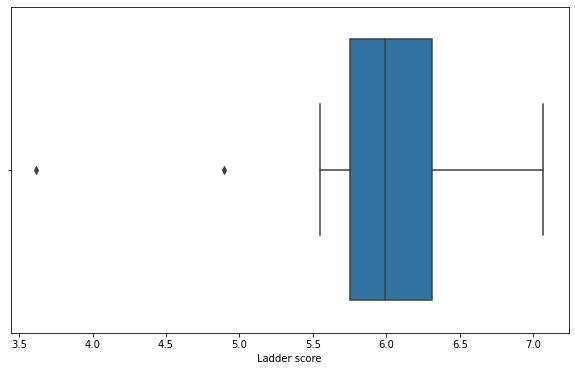

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Ladder score", data=latin_america_caribbean);

In the Latin America and Caribbean, based on the happiness score distributions, 2 possible outliers can be seen. Both outliers are at the minimum side of the happiness score.

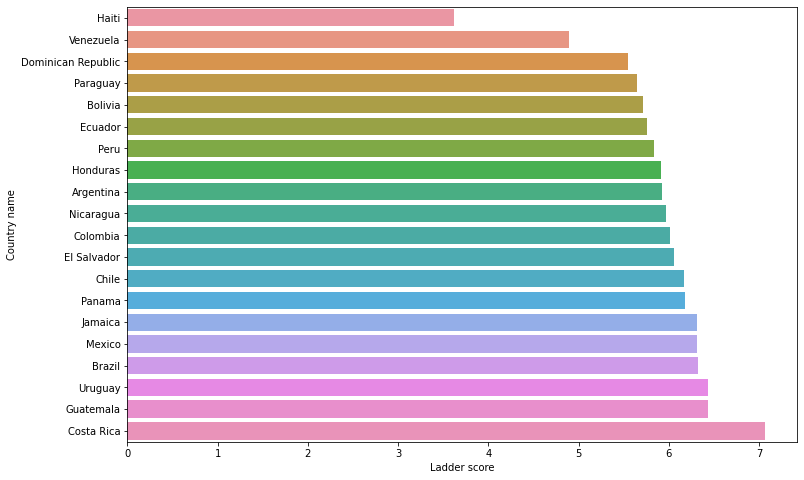

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Ladder score", y="Country name", data=latin_america_caribbean, orient="h",
           order=latin_america_caribbean.sort_values('Ladder score')["Country name"]);

In [49]:
fig = px.bar(latin_america_caribbean, x='Ladder score', y='Country name')
fig.show()

As seen in the barplot,

- Costa Rica has the highest happiness score in the Latin America and Caribbean region.
- Haiti and Venezuela have the lowest happiness score in the Latin America and Caribbean region and are possible outliers based on the happiness score distribution in the given region.

It would be good idea to see and compare the happpiness score trends in the past years. Let's look at the previous years happines score for all the countries in the region.

In [74]:
latin_america_caribbean_past=df_past[df_past['Country name'].isin(latin_america_caribbean['Country name'].to_list())].loc[:,'Country name':'Ladder score']
latin_america_caribbean_past.sample(3)

,Country name,year,Ladder score
1365,Paraguay,2019,5.653
182,Bolivia,2010,5.781
1245,Nicaragua,2012,5.448


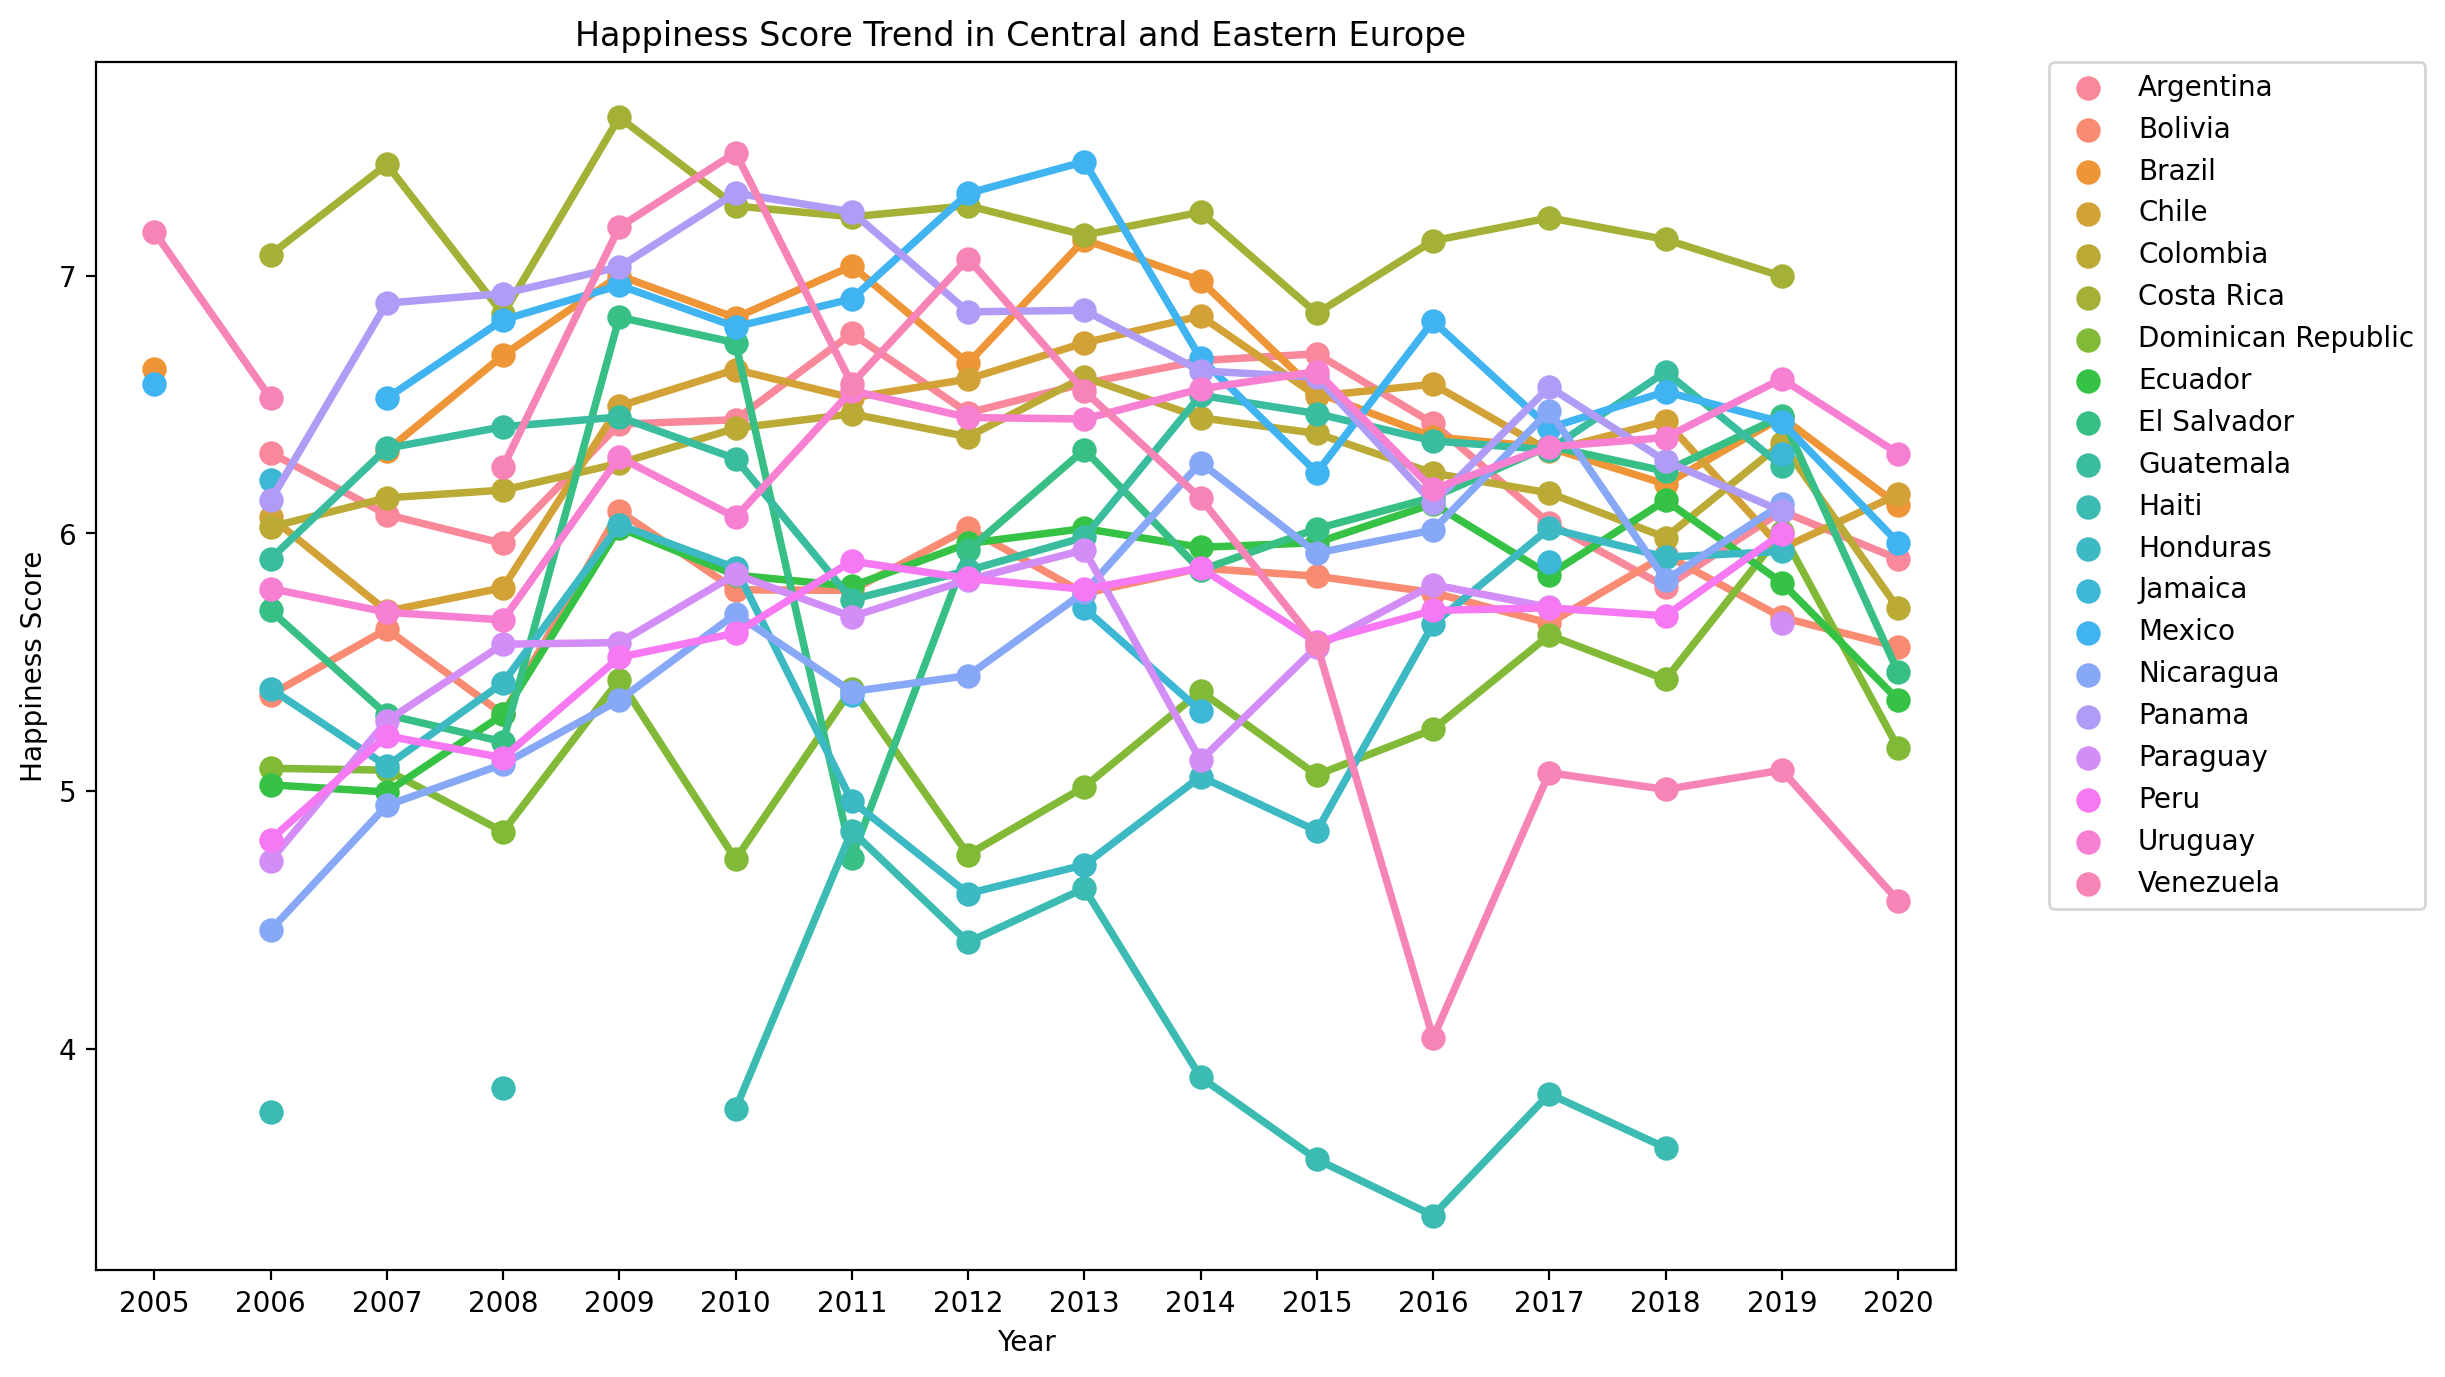

In [85]:
plt.figure(figsize=(12, 8), dpi=200)
sns.pointplot(x="year", y="Ladder score", data=latin_america_caribbean_past, hue="Country name")
plt.title("Happiness Score Trend in Central and Eastern Europe ")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

And finally, let's look at the Happiness Score relation with the other variables in the region.

## Happiness Score & Logged GDP per capita

In [92]:
trace = go.Scatter(x = latin_america_caribbean['Ladder score'],y=latin_america_caribbean['Logged GDP per capita'],text = latin_america_caribbean['Country name'],mode='markers',marker={'color':'blue', 'size':10})
df=[trace]
layout = go.Layout(title='Happiness Score & Logged GDP per capita in Latin America and Caribbean',xaxis=dict(title='Ladder Score'),yaxis=dict(title='Logged GDP per capita'),hovermode='closest')
figure = go.Figure(data=df,layout=layout)
figure.update_layout(template='plotly_white',
                  font=dict(family="Oswald', sans-serif"))
figure.show()

## Happiness Score & Social Support

In [88]:
trace = go.Scatter(x = latin_america_caribbean['Ladder score'],y=latin_america_caribbean['Social support'],text = latin_america_caribbean['Country name'],mode='markers',marker={'color':'blue', 'size':10})
df=[trace]
layout = go.Layout(title='Happiness Score & Social Support in Latin America and Caribbean',xaxis=dict(title='Ladder Score'),yaxis=dict(title='Logged GDP per capita'),hovermode='closest')
figure = go.Figure(data=df,layout=layout)
figure.update_layout(template='plotly_white',
                  font=dict(family="Oswald', sans-serif"))
figure.show()

## Happiness Score & Healthy Life Expectancy

In [93]:
trace = go.Scatter(x = latin_america_caribbean['Ladder score'],y=latin_america_caribbean['Healthy life expectancy'],text = latin_america_caribbean['Country name'],mode='markers',marker={'color':'blue', 'size':10})
df=[trace]
layout = go.Layout(title='Happiness Score & Healthy Life Expectancy in Latin America and Caribbean',xaxis=dict(title='Ladder Score'),yaxis=dict(title='Logged GDP per capita'),hovermode='closest')
figure = go.Figure(data=df,layout=layout)
figure.update_layout(template='plotly_white',
                  font=dict(family="Oswald', sans-serif"))
figure.show()

## Happiness Score & Freedom to Make Life Choices

In [94]:
trace = go.Scatter(x = latin_america_caribbean['Ladder score'],y=latin_america_caribbean['Freedom to make life choices'],text = latin_america_caribbean['Country name'],mode='markers',marker={'color':'blue', 'size':10})
df=[trace]
layout = go.Layout(title='Happiness Score & Freedom to Make Life Choices in Latin America and Caribbean',xaxis=dict(title='Ladder Score'),yaxis=dict(title='Logged GDP per capita'),hovermode='closest')
figure = go.Figure(data=df,layout=layout)
figure.update_layout(template='plotly_white',
                  font=dict(family="Oswald', sans-serif"))
figure.show()

## Happiness Score & Generosity

In [95]:
trace = go.Scatter(x = latin_america_caribbean['Ladder score'],y=latin_america_caribbean['Generosity'],text = latin_america_caribbean['Country name'],mode='markers',marker={'color':'blue', 'size':10})
df=[trace]
layout = go.Layout(title='Happiness Score & Generosity in Latin America and Caribbean',xaxis=dict(title='Ladder Score'),yaxis=dict(title='Logged GDP per capita'),hovermode='closest')
figure = go.Figure(data=df,layout=layout)
figure.update_layout(template='plotly_white',
                  font=dict(family="Oswald', sans-serif"))
figure.show()

## Happiness Score & Perceptions of Corruption

In [96]:
trace = go.Scatter(x = latin_america_caribbean['Ladder score'],y=latin_america_caribbean['Perceptions of corruption'],text = latin_america_caribbean['Country name'],mode='markers',marker={'color':'blue', 'size':10})
df=[trace]
layout = go.Layout(title='Happiness Score & Perceptions of Corruption in Latin America and Caribbean',xaxis=dict(title='Ladder Score'),yaxis=dict(title='Logged GDP per capita'),hovermode='closest')
figure = go.Figure(data=df,layout=layout)
figure.update_layout(template='plotly_white',
                  font=dict(family="Oswald', sans-serif"))
figure.show()

* Thanks for your time to read the Latin America and Caribbean's Happines Score EDA.



* All the best